## Find RNN performing better than DNN

In [2]:
import pandas as pd
import numpy as np
from collections import *
from itertools import islice
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import os
import time
import csv
import logging
import threading
from multiprocessing import Process, Pool, Manager
import multiprocessing as mp
import os

In [3]:
dates = os.listdir('./KISTI_rawdata/')

FileNotFoundError: [Errno 2] No such file or directory: './KISTI_rawdata/'

In [37]:
dates

['.DS_Store', '20190714', '.ipynb_checkpoints']

In [38]:
dates= dates[:2]

In [39]:
with open('./KISTI_rawdata/' + dates[1]+'/conn.00-00-00-01-00-00.log') as f:
    f = f.readlines()
for line in f:
    if line.split("\t")[0]=='#fields':
        columns = line.split("\t")[1:]
        for i, c in enumerate(columns):
            if len(c.split("\n"))>1:
                columns[i] = c.split("\n")[0]
        break

In [40]:
# conn_lst = ['conn.00:00:00-01:00:00.log', 'conn.01:00:00-02:00:00.log', 'conn.02:00:00-03:00:00.log', 'conn.03:00:00-04:00:00.log',\
#             'conn.04:00:00-05:00:00.log', 'conn.05:00:00-06:00:00.log', 'conn.06:00:00-07:00:00.log', 'conn.07:00:00-08:00:00.log',\
#             'conn.08:00:00-09:00:00.log', 'conn.09:00:00-10:00:00.log', 'conn.10:00:00-11:00:00.log', 'conn.11:00:00-12:00:00.log',\
#             'conn.12:00:00-13:00:00.log', 'conn.13:00:00-14:00:00.log', 'conn.14:00:00-15:00:00.log', 'conn.15:00:00-16:00:00.log',\
#             'conn.16:00:00-17:00:00.log', 'conn.17:00:00-18:00:00.log', 'conn.18:00:00-19:00:00.log', 'conn.19:00:00-20:00:00.log',\
#             'conn.20:00:00-21:00:00.log', 'conn.21:00:00-22:00:00.log', 'conn.22:00:00-23:00:00.log', 'conn.23:00:00-00:00:00.log']
conn_lst = ['conn.00-00-00-01-00-00.log', 'conn.01-00-00-02-00-00.log', 'conn.02-00-00-03-00-00.log', 'conn.03-00-00-04-00-00.log',\
            'conn.04-00-00-05-00-00.log', 'conn.05-00-00-06-00-00.log']

In [41]:
# weird_lst = ['weird.00:00:00-01:00:00.log', 'weird.01:00:00-02:00:00.log', 'weird.02:00:00-03:00:00.log', 'weird.03:00:00-04:00:00.log',\
#             'weird.04:00:00-05:00:00.log', 'weird.05:00:00-06:00:00.log', 'weird.06:00:00-07:00:00.log', 'weird.07:00:00-08:00:00.log',\
#             'weird.08:00:00-09:00:00.log', 'weird.09:00:00-10:00:00.log', 'weird.10:00:00-11:00:00.log', 'weird.11:00:00-12:00:00.log',\
#             'weird.12:00:00-13:00:00.log', 'weird.13:00:00-14:00:00.log', 'weird.14:00:00-15:00:00.log', 'weird.15:00:00-16:00:00.log',\
#             'weird.16:00:00-17:00:00.log', 'weird.17:00:00-18:00:00.log', 'weird.18:00:00-19:00:00.log', 'weird.19:00:00-20:00:00.log',\
#             'weird.20:00:00-21:00:00.log', 'weird.21:00:00-22:00:00.log', 'weird.22:00:00-23:00:00.log', 'weird.23:00:00-00:00:00.log']
weird_lst = ['weird.00-00-00-01-00-00.log', 'weird.01-00-00-02-00-00.log', 'weird.02-00-00-03-00-00.log', 'weird.03-00-00-04-00-00.log',\
            'weird.04-00-00-05-00-00.log', 'weird.05-00-00-06-00-00.log']

In [44]:
def make_conn_dataframe_kisti():
    dfs = []
    for i, c in enumerate(conn_lst):
        print(c)
        df = pd.read_csv('./KISTI_rawdata/' + '20190714'+ '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1)
        dfs.append(df)
    df = pd.concat(dfs)
    return df

In [45]:
df = make_conn_dataframe_kisti()

conn.00-00-00-01-00-00.log


/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


conn.01-00-00-02-00-00.log
conn.02-00-00-03-00-00.log
conn.03-00-00-04-00-00.log
conn.04-00-00-05-00-00.log
conn.05-00-00-06-00-00.log


In [46]:
len(df)

1008755

In [47]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1.563030e+09,CjYbuA2xMHIztpDWph,115.86.208.249,64961,210.98.16.101,123,udp,ntp,-,-,...,SHR,F,F,0,^d,0,0,1,76,-
1,1.563030e+09,C3TsUfKwd7W8mxkx2,155.230.159.208,53852,211.239.236.18,80,tcp,-,0.067863,0,...,OTH,F,F,0,^had,0,0,5,3198,-
2,1.563030e+09,CwP95oiW21Gj34h1l,211.61.240.195,33222,210.98.16.101,123,udp,ntp,-,-,...,SHR,F,F,0,^d,0,0,1,76,-
3,1.563030e+09,C2BRzs2Npbvg5RO0ve,42.82.112.14,55666,210.98.16.101,123,udp,ntp,-,-,...,SHR,F,F,0,^d,0,0,1,76,-
4,1.563030e+09,C7QcrppCohM2hCCXh,210.109.101.19,52223,103.8.230.47,33898,tcp,-,-,-,...,S0,F,F,0,S,1,40,0,0,-


In [48]:
with open('./KISTI_rawdata/' + '20190714'+'/weird.00-00-00-01-00-00.log') as f:
    f = f.readlines()
for line in f:
    if line.split("\t")[0]=='#fields':
        w_columns = line.split("\t")[1:]
        for i, c in enumerate(w_columns):
            if len(c.split("\n"))>1:
                w_columns[i] = c.split("\n")[0]
        break

In [49]:
def make_conn_dataframe_kisti_weird():
    dfs = []
    for i, c in enumerate(weird_lst):
        print(c)

        df = pd.read_csv('./KISTI_rawdata/' + '20190714' + '/'+ c, delimiter="\t", header=None, names=w_columns, skiprows=lambda x:x in range(8), skipfooter=1)
        dfs.append(df)
    df = pd.concat(dfs)
    return df

In [50]:
weird_df = make_conn_dataframe_kisti_weird()

weird.00-00-00-01-00-00.log


/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


weird.01-00-00-02-00-00.log
weird.02-00-00-03-00-00.log
weird.03-00-00-04-00-00.log
weird.04-00-00-05-00-00.log
weird.05-00-00-06-00-00.log


In [51]:
len(weird_df)

132844

In [52]:
weird_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,name,addl,notice,peer
0,1.563030e+09,Cn08tw4TYdEgsLZ4oa,61.249.93.101,35232,210.98.50.168,443,possible_split_routing,-,F,zeek
1,1.563030e+09,Cn08tw4TYdEgsLZ4oa,61.249.93.101,35232,210.98.50.168,443,data_before_established,-,F,zeek
2,1.563030e+09,Cn08tw4TYdEgsLZ4oa,61.249.93.101,35232,210.98.50.168,443,inappropriate_FIN,-,F,zeek
3,1.563030e+09,CBzOBN1W4DpS0dOtX8,61.249.93.101,35294,210.98.50.168,443,possible_split_routing,-,F,zeek
4,1.563030e+09,CBzOBN1W4DpS0dOtX8,61.249.93.101,35294,210.98.50.168,443,data_before_established,-,F,zeek


In [53]:
len(weird_df.uid.unique())

64487

In [54]:
weird_df = weird_df.drop_duplicates(subset='uid')

In [55]:
len(weird_df)

64487

In [57]:
merged_df = weird_df.drop(['ts'],axis=1).merge(df, on=['uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p'])

In [58]:
len(merged_df)

64350

In [59]:
merged_df["class"]="abnorm"

In [60]:
merged_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,name,addl,notice,peer,ts,...,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,class
0,Cn08tw4TYdEgsLZ4oa,61.249.93.101,35232,210.98.50.168,443,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SADFRR,14,1388,0,0,-,abnorm
1,CBzOBN1W4DpS0dOtX8,61.249.93.101,35294,210.98.50.168,443,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SAD,15,1375,0,0,-,abnorm
2,CymALZ3lyNs4Y7pj7i,61.249.94.113,44466,210.119.66.231,80,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SADFRR,9,1089,0,0,-,abnorm
3,C4VMM42zDL02w7Yty9,203.250.180.14,18004,211.239.236.9,80,above_hole_data_without_any_acks,-,F,zeek,1.563030e+09,...,F,F,0,^hacdttf,0,0,36,47159,-,abnorm
4,Cocgn7RiYeKi7Lpce,61.249.94.113,44630,210.119.66.231,80,possible_split_routing,-,F,zeek,1.563030e+09,...,F,F,0,SADF,11,1930,0,0,-,abnorm


In [61]:
weird_uid = merged_df.uid.unique()

In [62]:
norm_df = df[~df.uid.isin(weird_uid)]

In [63]:
norm_df["class"]='norm'

/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
len(list(set(merged_df.columns).intersection(set(norm_df.columns))))

22

In [65]:
set(merged_df.columns) - set(norm_df)

{'addl', 'name', 'notice', 'peer'}

In [66]:
len(norm_df.columns)

22

In [67]:
merged_df = merged_df.drop(['addl','name','notice','peer'], axis=1)

In [68]:
total_df = merged_df.append(norm_df)

/Users/jeeyung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [69]:
len(total_df)

1008755

In [86]:
len(merged_df['id.orig_h'])

64350

In [85]:
len(merged_df['id.orig_h'].unique())

2281

In [74]:
len(norm_df['id.orig_h'].values)

944405

In [87]:
len(norm_df['id.orig_h'].unique())

9478

### source ip address which were assigned to both weird and normal

In [72]:
len(list(set(merged_df['id.orig_h'].values).intersection(set(norm_df['id.orig_h'].values))))

1855

## only weird

In [90]:
len(list(set(merged_df['id.orig_h']) - set(merged_df['id.orig_h'].values).intersection(set(norm_df['id.orig_h'].values))))

426

In [76]:
shared_ips = list(set(merged_df['id.orig_h'].values).intersection(set(norm_df['id.orig_h'].values)))

In [83]:
set(shared_ips) - set()

1855

In [81]:
len(total_df[total_df['id.orig_h'].isin(shared_ips)])

508756

In [82]:
len(total_df)

1008755

In [93]:
shared_df = total_df[total_df['id.orig_h'].isin(shared_ips)]

### sampling dataframe

In [94]:
shared_df = shared_df.sample(frac=0.05, replace=False, random_state=1)

In [95]:
len(shared_df)

25438

In [96]:
shared_df["StartTime"] = pd.to_datetime(shared_df['ts'],unit='s')

In [97]:
shared_df.to_csv("kisti_logs_20190714_6_shared.csv")

In [100]:
total_df["StartTime"] = pd.to_datetime(total_df['ts'],unit='s')

In [101]:
total_df.to_csv("kisti_logs_20190714_6.csv")

In [76]:
total_df.service.unique()

array(['dns', '-', 'ntp', 'http', 'ssl', 'ssh', 'smtp', 'dhcp', 'imap',
       'ftp-data'], dtype=object)

In [108]:
total_df = total_df.sort_values(by='StartTime')

In [109]:
total_df.columns

Index(['class', 'conn_state', 'duration', 'history', 'id.orig_h', 'id.orig_p',
       'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'missed_bytes',
       'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'proto', 'resp_bytes',
       'resp_ip_bytes', 'resp_pkts', 'service', 'ts', 'tunnel_parents', 'uid',
       'StartTime'],
      dtype='object')

In [110]:
total_df.service.unique()

array(['-', 'ssl', 'http', 'dhcp', 'ntp', 'dns', 'ssh', 'imap', 'smtp',
       'ftp', 'mysql'], dtype=object)

In [133]:
total_df["min"] = total_df["StartTime"].apply(lambda x: x.minute)
total_df["sec"] = total_df["StartTime"].apply(lambda x: x.second)
total_df["hour"] = total_df["StartTime"].apply(lambda x: x.hour)
total_df["time_bin"] = total_df.apply(lambda x:int(x["hour"]) * 60*60 +int(x["min"])*60+int(x["sec"]), axis=1)

In [77]:
ss = pd.read_csv('kisti_logs.csv')

In [78]:
ss.service.unique()

array(['ssl', 'http', '-', 'dns', 'ssh', 'smtp', 'ftp', 'imap', 'ntp',
       'dhcp', 'mysql'], dtype=object)

In [134]:
total_df.head()

,class,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,...,service,ts,tunnel_parents,uid,StartTime,min,hour,time_bin,time_chunk,sec
486,norm,S0,67887.229412,D,211.239.236.28,12347,203.253.111.70,64018,F,F,...,-,1.562962e+09,-,CSR6NHAS56Ed2HxUj,2019-07-12 20:07:44.567903042,7,20,72464,986,44
75149,norm,OTH,41912.903533,AD,203.247.194.231,7221,122.254.212.40,1152,F,F,...,-,1.562989e+09,-,CD5DcG2P4Q5oBhUpng,2019-07-13 03:41:06.324259996,41,3,13266,0,6
64427,norm,SH,41992.938357,ADF,203.247.194.231,7221,180.182.211.30,12399,F,F,...,-,1.562989e+09,-,CKRL8N2g9aeFLMNnyh,2019-07-13 03:41:11.456676006,41,3,13271,0,11
72536,norm,SH,41345.322450,ADF,203.247.194.231,7221,114.111.217.245,49695,F,F,...,-,1.562990e+09,-,CjTu5E3wq5fB8yvpYa,2019-07-13 03:54:34.433711052,54,3,14074,13,34
9955,norm,SH,33362.569487,ADF,203.247.194.231,7221,114.111.247.207,2071,F,F,...,-,1.562997e+09,-,CsMURk4NMA7M9KYva,2019-07-13 05:47:15.942245007,47,5,20835,126,15


In [142]:
total_df.time_bin.min()

13266

In [143]:
total_df.time_bin.max()

72464

In [145]:
tb_lst = total_df.time_bin.unique()
tb_dict = dict()

In [146]:
for i in tb_lst:
    tb_dict[i] = (i - total_df.time_bin.min())//30

In [147]:
total_df["time_chunk"] = total_df["time_bin"].apply(lambda x:tb_dict[x])

In [148]:
total_df["time_chunk"].unique()

array([1973,    0,   26,  252,  274,  450,  765,  775, 1138, 1140, 1146,
       1194, 1228, 1230, 1245, 1246, 1250, 1251, 1257, 1258, 1261, 1262,
       1263, 1264, 1265, 1270, 1277, 1283, 1296, 1297, 1299, 1300, 1302,
       1304, 1305, 1310, 1313, 1316, 1317, 1322, 1324, 1328, 1329, 1331,
       1332, 1333, 1334, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344,
       1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355,
       1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366,
       1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377,
       1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388,
       1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399,
       1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410,
       1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421,
       1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432,
       1433, 1434, 1435, 1436, 1437, 1438, 1439, 14

In [150]:
len(total_df[total_df["time_chunk"]==1477])

628

In [151]:
total_df.columns

Index(['class', 'conn_state', 'duration', 'history', 'id.orig_h', 'id.orig_p',
       'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'missed_bytes',
       'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'proto', 'resp_bytes',
       'resp_ip_bytes', 'resp_pkts', 'service', 'ts', 'tunnel_parents', 'uid',
       'StartTime', 'min', 'hour', 'time_bin', 'time_chunk', 'sec'],
      dtype='object')

In [152]:
total_df.proto.unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [203]:
grouped = total_df.filter(['duration','orig_pkts','resp_pkts','orig_ip_bytes','resp_ip_bytes',\
                     'proto','service',"time_chunk",'id.orig_h', 'id.resp_p', 'id.orig_p','id.resp_h','StartTime'], axis=1).groupby(["time_chunk",'id.orig_h'], sort=True)
result = grouped['duration','orig_pkts','resp_pkts','orig_ip_bytes','resp_ip_bytes'].aggregate([np.mean, np.std])
# result = grouped['orig_pkts','resp_pkts','orig_ip_bytes','resp_ip_bytes'].aggregate([np.mean, np.std])

In [204]:
result_fl = result.reset_index(level=[0,1])

In [205]:
total_df.duration = total_df.apply(lambda x: 0 if x.duration =='-' else x.duration, axis=1)

In [206]:
total_df.duration = total_df.duration.astype(float)

In [207]:
result_fl.head()

time_chunk        id.orig_h      duration             orig_pkts             \
                                       mean        std       mean        std   
0          0  203.247.194.231  41952.920945  56.593167      256.5  24.748737   
1         26  203.247.194.231  41345.322450        NaN      239.0        NaN   
2        252  203.247.194.231  33362.569487        NaN      196.0        NaN   
3        274   211.236.229.96  34371.068022        NaN   440735.0        NaN   
4        450     203.230.52.3  29593.601455        NaN  2318341.0        NaN   

  resp_pkts      orig_ip_bytes              resp_ip_bytes       
       mean  std          mean          std          mean  std  
0       0.0  0.0       10644.5  1356.937913           0.0  0.0  
1       0.0  NaN        9827.0          NaN           0.0  NaN  
2       0.0  NaN        8030.0          NaN           0.0  NaN  
3  513948.0  NaN    90569903.0          NaN   641887377.0  NaN  
4       0.0  NaN   271834107.0          NaN           0.0  NaN

In [175]:
result_fl.columns = [' '.join(col).strip() for col in result_fl.columns.values]

In [179]:
result_fl = result_fl.fillna(0)

In [180]:
result_fl.head()

,time_chunk,id.orig_h,orig_pkts mean,orig_pkts std,resp_pkts mean,resp_pkts std,orig_ip_bytes mean,orig_ip_bytes std,resp_ip_bytes mean,resp_ip_bytes std
0,0,203.247.194.231,256.5,24.748737,0.0,0.0,10644.5,1356.937913,0.0,0.0
1,26,203.247.194.231,239.0,0.000000,0.0,0.0,9827.0,0.000000,0.0,0.0
2,252,203.247.194.231,196.0,0.000000,0.0,0.0,8030.0,0.000000,0.0,0.0
3,274,211.236.229.96,440735.0,0.000000,513948.0,0.0,90569903.0,0.000000,641887377.0,0.0
4,450,203.230.52.3,2318341.0,0.000000,0.0,0.0,271834107.0,0.000000,0.0,0.0


In [160]:
test = total_df.filter(['duration','orig_pkts','resp_pkts','orig_bytes','resp_bytes',\
                     'proto','service',"time_chunk",'id.orig_h'], axis=1).groupby(["time_chunk",'id.orig_h',"service"]).size().unstack(fill_value=0).reset_index(level=[0,1])

In [161]:
test_2 = total_df.filter(['duration','orig_pkts','resp_pkts','orig_bytes','resp_bytes',\
                     'proto','service',"time_chunk",'id.orig_h'], axis=1).groupby(["time_chunk",'id.orig_h',"proto"]).size().unstack(fill_value=0).reset_index(level=[0,1])

In [172]:
ss = test.merge(result_fl)
ss = ss.merge(test_2)

In [173]:
ss.head()

,time_chunk,id.orig_h,-,dhcp,dns,ftp,http,imap,mysql,ntp,...,orig_pkts std,resp_pkts mean,resp_pkts std,orig_ip_bytes mean,orig_ip_bytes std,resp_ip_bytes mean,resp_ip_bytes std,icmp,tcp,udp
0,0,203.247.194.231,2,0,0,0,0,0,0,0,...,24.748737,0.0,0.0,10644.5,1356.937913,0.0,0.0,0,2,0
1,26,203.247.194.231,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,9827.0,0.000000,0.0,0.0,0,1,0
2,252,203.247.194.231,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,8030.0,0.000000,0.0,0.0,0,1,0
3,274,211.236.229.96,1,0,0,0,0,0,0,0,...,0.000000,513948.0,0.0,90569903.0,0.000000,641887377.0,0.0,0,1,0
4,450,203.230.52.3,1,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,271834107.0,0.000000,0.0,0.0,0,1,0


In [ ]:
# test_3 = df.filter(['duration','orig_pkts','resp_pkts','orig_bytes','resp_bytes',\
#                      'proto','service',"time_chunk",'id.orig_h'], axis=1).groupby(["time_chunk","SrcAddr","State"]).size().unstack(fill_value=0).reset_index(level=[0,1])

In [20]:
# manager = mp.Manager()
# df_lst = manager.dict()

In [8]:
# def make_conn_dataframe(name):
#     print("Process %s: starting", name, "pid=", os.getpid())
#     time.sleep(1)
#     dfs = []
#     for c in conn_lst:
#         try:
#             dfs.append(pd.read_csv('./logs/' + name + '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1))
# #             print(c," done in ", name)
#         except:
#             print(c)
#             continue
#     df = pd.concat(dfs)
#     df_lst[name] = df
#     print("Process %s: finishing", name)

In [9]:
# df_weird_lst = manager.dict()

In [10]:
# def make_weird_dataframe(name):
#     print("Process %s: starting", name, "pid=", os.getpid())
#     time.sleep(1)
#     dfs = []
#     for c in weird_lst:
#         try:
#             dfs.append(pd.read_csv('./logs/' + name + '/'+ c, delimiter="\t", header=None, names=columns, skiprows=lambda x:x in range(8), skipfooter=1))
# #             print(c," done in ", name)
#         except:
#             print(c)
#             continue
#     df = pd.concat(dfs)
#     df_weird_lst[name] = df
#     print("Process %s: finishing", name)

In [11]:
# st_time = time.time()
# p = Pool(10)
# p.map(make_conn_dataframe, [d for d in dates])
# # p.map(make_weird_dataframe, [d for d in dates])
# p.close()
# p.join()
# print(time.time() -st_time)

Process %s: starting 2019-07-14 pid= 7378
Process %s: starting 2019-08-13 pid= 7405
Process %s: starting 2019-08-01 pid= 7402
Process %s: starting 2019-07-06 pid= 7386
Process %s: starting 2019-07-26 pid= 7392


/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' eng

Process %s: finishing 2019-07-14
Process %s: finishing 2019-07-06
Process %s: finishing 2019-07-26
Process %s: finishing 2019-08-13
Process %s: finishing 2019-08-01
192.57581686973572


In [14]:
# bad_ports = [31, 1170, 1234, 1243, 1981, 2001, 2023, 2140, 2989, 3024, 3150, 3700, 4950, 6346, 6400, 6667, 6670, 12345, 12346, 16660,\
#             18753, 20034, 20432, 20433, 27374, 27444, 27665, 30100, 31335, 31337, 33270, 33567, 33568, 40421, 60008,65000]

In [ ]:
# bad_timebin_dict = dict()

In [81]:
# date = '2019-07-06'

In [1]:
# df_lst[date].head()

NameError: name 'df_lst' is not defined

In [82]:
dns_filterd_df = df_lst[date][~df_lst[date]["service"].isin(["dns", "ntp", "smtp"])]

In [83]:
dns_filterd_df["datetime"] = dns_filterd_df.ts.apply(lambda ts : datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
dns_filterd_df["hour"] = dns_filterd_df.datetime.apply(lambda x:x.split(" ")[1].split(":")[0])
dns_filterd_df["min"] = dns_filterd_df.datetime.apply(lambda x:x.split(" ")[1].split(":")[1])
dns_filterd_df["time_bin"] = dns_filterd_df.apply(lambda x:int(x["hour"]) * 60 +int(x["min"]), axis=1)
dns_filterd_df_srt = dns_filterd_df.sort_values(by=["time_bin"])

In [84]:
cnt = dns_filterd_df_srt.groupby("time_bin").size().reset_index(name='count')
tv = cnt['time_bin'].values
cc = cnt['count'].values

In [85]:
cnt["sum_cnt"] = cnt["count"].rolling(10, center=True).sum()

In [86]:
cnt.head()

,time_bin,count,sum_cnt
0,0,2188,NaN
1,1,1735,NaN
2,2,1847,NaN
3,3,1832,NaN
4,4,1859,NaN


In [87]:
# service_cnt = Counter(dict(zip(cnt['time_bin'].values, cnt['count'])))
timeaxis = dns_filterd_df_srt["time_bin"].values
orbytes = dns_filterd_df_srt["orig_ip_bytes"].values
rebytes = dns_filterd_df_srt["resp_ip_bytes"].values
dur = dns_filterd_df_srt["duration"].values

In [192]:
dns_filterd_df_srt.duration = dns_filterd_df_srt.duration.apply(lambda x:0 if x=='-' else float(x))

NameError: name 'dns_filterd_df_srt' is not defined

In [89]:
df_badports = dns_filterd_df_srt[dns_filterd_df_srt["id.resp_p"].isin(bad_ports)]
bad_timebin = df_badports["time_bin"].values

In [90]:
bad_timebin_dict[date] = bad_timebin

In [91]:
ipb_df = dns_filterd_df_srt[["time_bin","orig_ip_bytes","resp_ip_bytes","duration"]].groupby("time_bin").mean().reset_index()

In [92]:
ipb_df["sum_orig_ip"] = ipb_df["orig_ip_bytes"].rolling(10, center=True).sum()
ipb_df["sum_resp_ip"] = ipb_df["resp_ip_bytes"].rolling(10, center=True).sum()
ipb_df["sum_dur"] = ipb_df["duration"].rolling(10, center=True).sum()

## count analysis

In [93]:
cnt[cnt["time_bin"].isin(bad_timebin)]["sum_cnt"].mean()

18743.720588235294

In [94]:
cnt[~cnt["time_bin"].isin(bad_timebin)]["sum_cnt"].mean()

17499.4592809978

In [95]:
weird_time_evnt = cnt[cnt["sum_cnt"]>cnt[cnt["time_bin"].isin(bad_timebin)]["sum_cnt"].mean()]["time_bin"].values

In [96]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 15),
 (31337, 6),
 (6667, 5),
 (3700, 5),
 (33568, 3),
 (1243, 2),
 (33270, 1),
 (6400, 1),
 (1234, 1),
 (1981, 1),
 (2023, 1)]

## size analysis

In [97]:
ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_orig_ip"].mean()

127897.66616541085

In [98]:
ipb_df[~ipb_df["time_bin"].isin(bad_timebin)]["sum_orig_ip"].mean()

78561.9992944814

In [99]:
weird_time_evnt_orig = ipb_df[ipb_df["sum_orig_ip"]>ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_orig_ip"].mean()]["time_bin"].values

In [100]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_orig)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_orig)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 6), (3700, 5), (1243, 3), (1234, 2), (6346, 1), (6667, 1), (33568, 1)]

In [101]:
ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_resp_ip"].mean()

2009534.4105320845

In [102]:
ipb_df[~ipb_df["time_bin"].isin(bad_timebin)]["sum_resp_ip"].mean()

1779871.7452192733

In [103]:
weird_time_evnt_resp = ipb_df[ipb_df["sum_resp_ip"]>ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_resp_ip"].mean()]["time_bin"].values

In [104]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_resp)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_resp)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 15),
 (6667, 4),
 (3700, 4),
 (1234, 4),
 (1243, 3),
 (6346, 1),
 (60008, 1),
 (31337, 1),
 (33568, 1),
 (1981, 1),
 (2023, 1)]

In [105]:
ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_dur"].mean()

261.28184682602404

In [106]:
ipb_df[~ipb_df["time_bin"].isin(bad_timebin)]["sum_dur"].mean()

255.97396947748015

In [107]:
weird_time_evnt_dur = ipb_df[ipb_df["sum_dur"]>ipb_df[ipb_df["time_bin"].isin(bad_timebin)]["sum_dur"].mean()]["time_bin"].values

In [108]:
Counter(dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_dur)][dns_filterd_df[dns_filterd_df["time_bin"].isin(weird_time_evnt_dur)]["id.resp_p"].isin(bad_ports)]["id.resp_p"].values).most_common()

[(2001, 13),
 (3700, 5),
 (6667, 3),
 (31337, 2),
 (33568, 1),
 (1234, 1),
 (1981, 1)]

In [109]:
Counter(dns_filterd_df[dns_filterd_df["id.resp_p"].isin(bad_ports)]["id.resp_p"])

Counter({6346: 1,
         6667: 7,
         2001: 36,
         12345: 1,
         4950: 1,
         1243: 4,
         1170: 1,
         12346: 3,
         60008: 1,
         31337: 6,
         33270: 1,
         33568: 3,
         3700: 5,
         6400: 1,
         1234: 4,
         1981: 1,
         2023: 1})

### bad time bin

In [110]:
time0801 = list(bad_timebin_dict.values())[0]
time0813 = list(bad_timebin_dict.values())[1]
time0706 = list(bad_timebin_dict.values())[2]

In [114]:
set(time0801).intersection(set(time0813))

{4, 99, 157, 184, 229, 249, 359, 364, 716, 864}

In [113]:
time0813

array([   3,    4,    4,    5,    9,   14,   19,   24,   29,   34,   39,
         44,   49,   51,   54,   59,   60,   64,   69,   74,   79,   84,
         89,   93,   94,   99,  104,  109,  114,  119,  124,  129,  134,
        139,  144,  149,  154,  157,  158,  159,  164,  169,  174,  177,
        179,  184,  184,  189,  194,  199,  204,  209,  214,  215,  219,
        224,  229,  234,  239,  243,  244,  249,  254,  259,  264,  269,
        272,  274,  279,  279,  284,  289,  294,  299,  304,  309,  314,
        319,  324,  327,  328,  328,  329,  329,  329,  329,  334,  339,
        341,  344,  349,  351,  353,  354,  359,  360,  364,  367,  369,
        374,  379,  384,  389,  394,  398,  399,  401,  403,  403,  403,
        404,  405,  406,  409,  409,  413,  414,  419,  424,  429,  434,
        437,  438,  439,  441,  444,  448,  448,  449,  457,  457,  457,
        457,  457,  457,  458,  458,  458,  458,  458,  458,  458,  458,
        458,  458,  459,  469,  498,  499,  502,  5

In [112]:
time0706 

array([   6,    6,    6,   64,   98,  174,  178,  186,  212,  212,  212,
        215,  290,  295,  366,  393,  447,  460,  490,  492,  492,  492,
        508,  534,  610,  623,  624,  645,  656,  661,  666,  667,  677,
        679,  686,  687,  688,  697,  699,  708,  709,  712,  720,  724,
        724,  726,  726,  729,  731,  740,  742,  751,  752,  759,  763,
        774,  775,  785,  794,  796,  806,  817,  828,  832,  832,  833,
        835,  839,  894,  921,  937, 1026, 1149, 1223, 1259, 1398, 1431])

## visualize

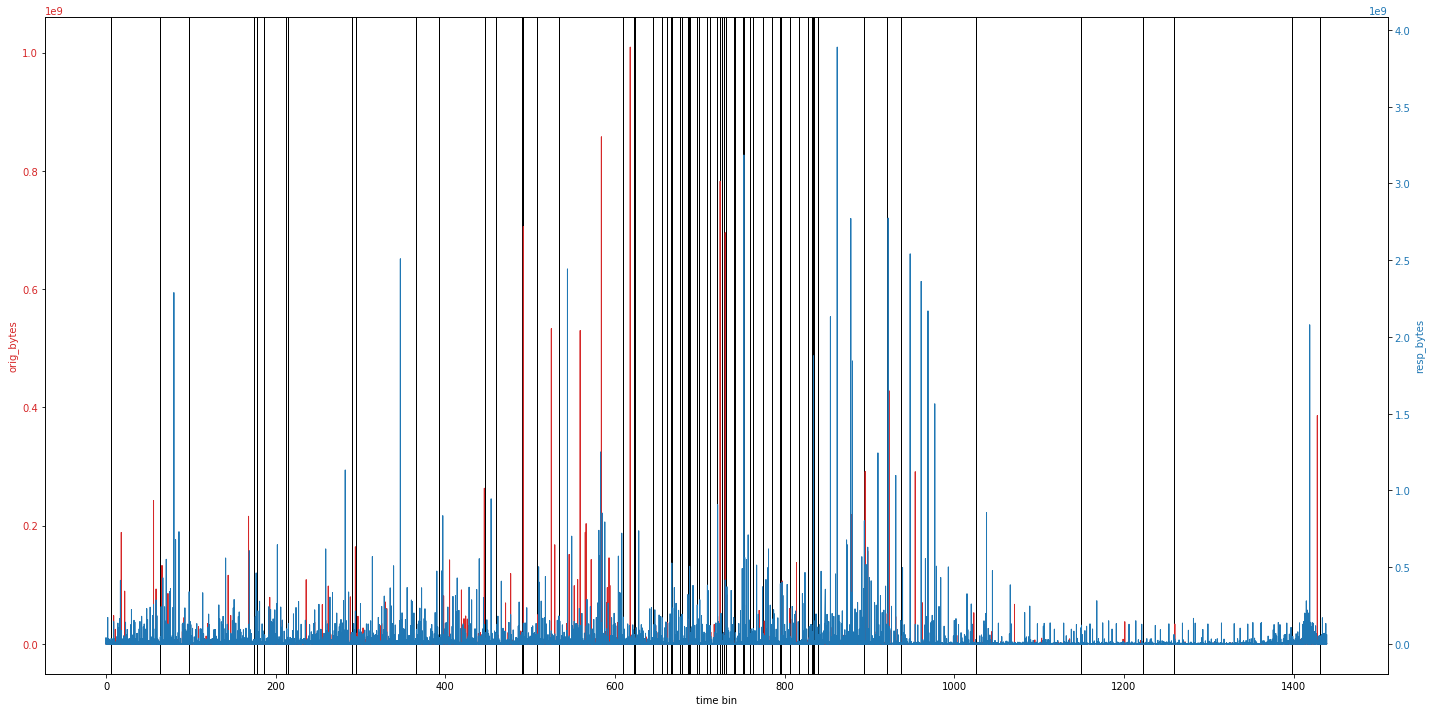

In [60]:
fig, ax1 = plt.subplots(figsize=(20,10))

for i in bad_timebin:
    ax1.axvline(i, color='k', lw=1)
    
color = 'tab:red'
ax1.set_xlabel('time bin')
ax1.set_ylabel('orig_bytes', color=color)
ax1.plot(timeaxis, orbytes, '-', lw=1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('resp_bytes', color=color)  # we already handled the x-label with ax1
ax2.plot(timeaxis, rebytes, '-', lw=1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
plt.show()
# plt.savefig('./figure/bytes_bad_ports.png')

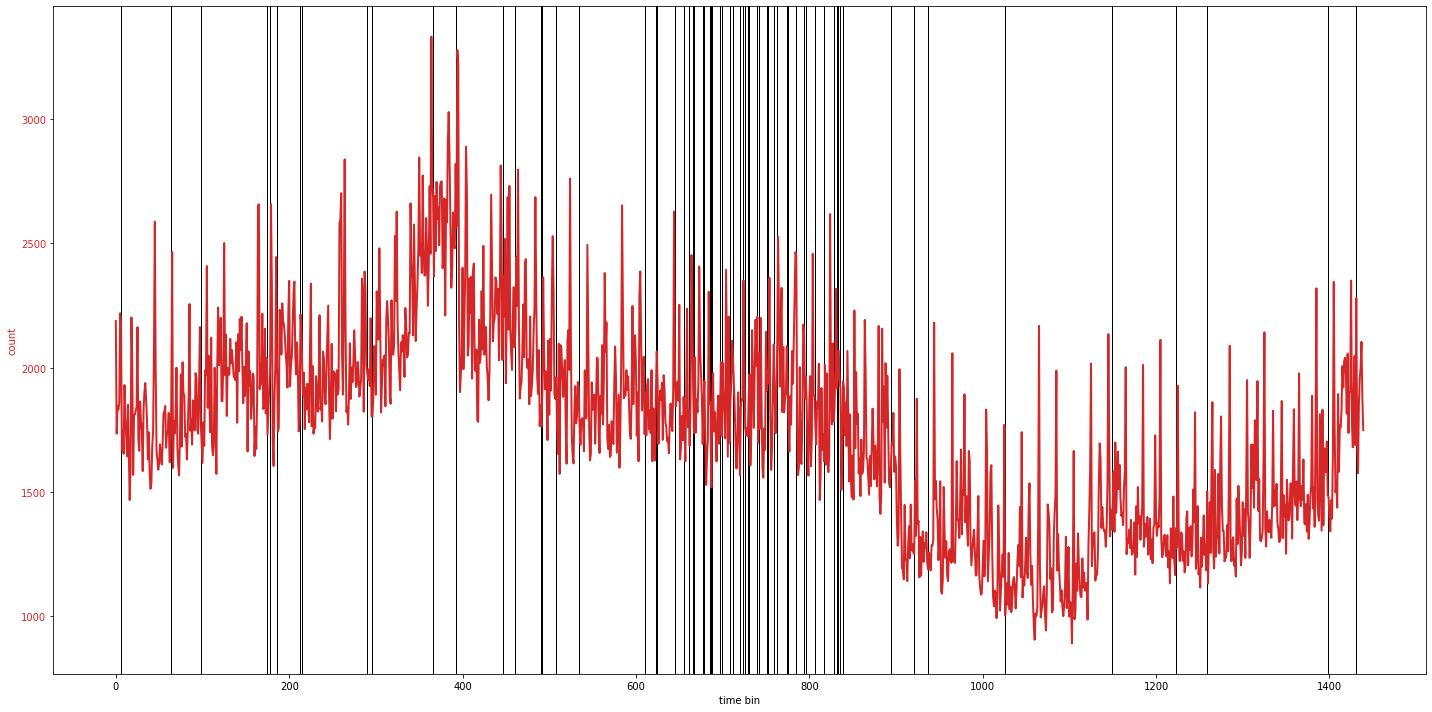

In [61]:
fig, ax1 = plt.subplots(figsize=(20,10))

for i in bad_timebin:
    ax1.axvline(i, color='k', lw=1)
    
color = 'tab:red'
ax1.set_xlabel('time bin')
ax1.set_ylabel('count', color=color)
ax1.plot(tv, cc, '-', lw=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.tight_layout()
plt.show()
# plt.savefig('./figure/count_bad_ports.png')

### transfer learning

In [27]:
total_df = pd.read_csv("kisti_logs_20190714_6.csv")

In [31]:
total_df.columns

Index(['Unnamed: 0', 'class', 'conn_state', 'duration', 'history', 'id.orig_h',
       'id.orig_p', 'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp',
       'missed_bytes', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'proto',
       'resp_bytes', 'resp_ip_bytes', 'resp_pkts', 'service', 'ts',
       'tunnel_parents', 'uid', 'StartTime'],
      dtype='object')

In [32]:
total_df["datetime"] = total_df.ts.apply(lambda ts : datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))
total_df["hour"] = total_df.datetime.apply(lambda x:x.split(" ")[1].split(":")[0])
total_df["min"] = total_df.datetime.apply(lambda x:x.split(" ")[1].split(":")[1])
total_df["time_bin"] = total_df.apply(lambda x:int(x["hour"]) * 60 +int(x["min"]), axis=1)
total_df = total_df.sort_values(by=["time_bin"])

In [33]:
total_df.head()

,Unnamed: 0,class,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,...,resp_pkts,service,ts,tunnel_parents,uid,StartTime,datetime,hour,min,time_bin
16459,208,norm,OTH,900.158960,DA,114.71.101.155,61257,211.239.158.29,65004,F,...,0,-,1.563029e+09,-,CGOnuj2XYC0n83Boi9,2019-07-13 14:40:04.281556129,2019-07-13 14:40:04,14,40,880
46426,1658,norm,SHR,587.434908,^hadcccttf,155.230.178.52,4469,211.239.234.126,443,F,...,13158,-,1.563029e+09,-,CB5hx51MhdF8onG5Pb,2019-07-13 14:50:44.681500912,2019-07-13 14:50:44,14,50,890
40813,8149,norm,OTH,299.995658,AD,210.112.114.199,65004,155.230.14.135,5730,F,...,0,-,1.563030e+09,-,CSTzY61htbfofwMgek,2019-07-13 14:52:46.325266123,2019-07-13 14:52:46,14,52,892
14114,1520,norm,SHR,73.017063,^hadcf,223.28.138.179,49390,134.75.122.14,80,F,...,10,-,1.563030e+09,-,CyTWiD2kJ2dBHwCJN4,2019-07-13 14:54:21.444880009,2019-07-13 14:54:21,14,54,894
41199,8088,norm,SHR,195.816834,^hacdf,155.230.153.31,9787,203.235.96.73,443,F,...,9,-,1.563030e+09,-,CaD3a22j088IfIv1l1,2019-07-13 14:54:29.248164177,2019-07-13 14:54:29,14,54,894


In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pickle
import scipy.stats as st
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [454]:
with open('KISTI_botnet_values.pkl', 'rb') as f:
    kisti_botnet = pickle.load(f)

In [4]:
with open('KISTI_normal_values.pkl', 'rb') as f:
     kisti_normal = pickle.load(f)

In [406]:
with open('200304151612_CTU_RNN_small_30_23_0.01_True_False_300_5_1_True_500_1_False_False_False_pdf_3_False_True/CTU_valid_botnet_values.pkl', 'rb') as f:
    ctu_botnet = pickle.load(f)

In [407]:
with open('200304151612_CTU_RNN_small_30_23_0.01_True_False_300_5_1_True_500_1_False_False_False_pdf_3_False_True/CTU_valid_normal_values.pkl', 'rb') as f:
     ctu_normal = pickle.load(f)

In [408]:
with open('200304151612_CTU_RNN_small_30_23_0.01_True_False_300_5_1_True_500_1_False_False_False_pdf_3_False_True/300_CTU_test_botnet_values.pkl', 'rb') as f:
    ctu_botnet_test = pickle.load(f)

In [409]:
with open('200304151612_CTU_RNN_small_30_23_0.01_True_False_300_5_1_True_500_1_False_False_False_pdf_3_False_True/300_CTU_test_normal_values.pkl', 'rb') as f:
     ctu_normal_test = pickle.load(f)

In [412]:
with open('200304010140_CTU_RNN_small_30_23_0.01_True_False_5_5_1_True_500_1_False_False_False_pdf_3_False_True/CTU_valid_botnet_values.pkl', 'rb') as f:
    ctu_botnet_20 = pickle.load(f)

In [413]:
with open('200304010140_CTU_RNN_small_30_23_0.01_True_False_5_5_1_True_500_1_False_False_False_pdf_3_False_True/CTU_valid_normal_values.pkl', 'rb') as f:
     ctu_normal_20 = pickle.load(f)

In [19]:
with open('saved/runs/200531090909_CTU_RNN_small_30_23_0.01_True_False_60_20_1_True_1000_1_False_False_False_pdf_3_False_True/60_CTU_test_botnet_values.pkl', 'rb') as f:
    ctu_botnet_test_60_rnn = pickle.load(f)

In [20]:
with open('saved/runs/200531090909_CTU_RNN_small_30_23_0.01_True_False_60_20_1_True_1000_1_False_False_False_pdf_3_False_True/60_CTU_test_normal_values.pkl', 'rb') as f:
    ctu_normal_test_60_rnn = pickle.load(f)

In [6]:
with open('saved/runs/200531181050_CTU_DNN_small_30_23_0.01_False_False_60_20_1_False_500_1_False_False_False_pdf_3_False_True/60_CTU_test_botnet_values.pkl', 'rb') as f:
    ctu_botnet_test_60 = pickle.load(f)

In [7]:
with open('saved/runs/200531181050_CTU_DNN_small_30_23_0.01_False_False_60_20_1_False_500_1_False_False_False_pdf_3_False_True/60_CTU_test_normal_values.pkl', 'rb') as f:
     ctu_normal_test_60 = pickle.load(f)

In [192]:
len(ctu_botnet_test)

2585

In [171]:
ctu_botnet_test

array([6.2434525, 6.6354976, 6.5417237, ..., 6.3164077, 6.6083584,
       5.4890676], dtype=float32)

In [7]:
len(ctu_normal_test)

3302

In [8]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
#     DISTRIBUTIONS = [
# #         st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
#         st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
#         st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
#         st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
#     ]
    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
#             with warnings.catch_warnings():
#                 warnings.filterwarnings('ignore')

                # fit dist to data
            params = distribution.fit(data)

            # Separate parts of parameters
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]

            # Calculate fitted PDF and error with fit in distribution
            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))
            # if axis pass in add to plot
            try:
                if ax:
                    pd.Series(pdf, x).plot(ax=ax)
                end
            except Exception:
                pass

            # identify if this distribution is better
            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse

        except Exception:
            print('exception')
            pass

    return (best_distribution.name, best_params)

In [17]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.02, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.02, loc=loc, scale=scale)
    end = dist.ppf(0.995, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.995, loc=loc, scale=scale)
    
    # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
    x = np.linspace(0, 20, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [128]:
arg = params[:-2]
loc = params[-2]
scale = params[-1]
ss = getattr(st, dist)
abnorm = ss.cdf(14.7, loc=loc, scale=scale, *arg)

In [129]:
abnorm

0.1835667079796195

In [106]:
params

(8.113418733519612, 14.654460566665263, 0.027063782774678972)

In [130]:
dist, params = best_fit_distribution(normal)

In [131]:
arg = params[:-2]
loc = params[-2]
scale = params[-1]
ss = getattr(st, dist)
norm = ss.cdf(14.7, loc=loc, scale=scale, *arg)

In [134]:
norm - 0.5 

0.11251015404265219

In [133]:
1 - norm

0.3874898459573478

In [109]:
params

(1.5074828205440043, 14.40182091416995, 0.2584584062306823)

Text(0.5, 1.0, 'dgamma(a=0.78, loc=6.31, scale=0.51)')

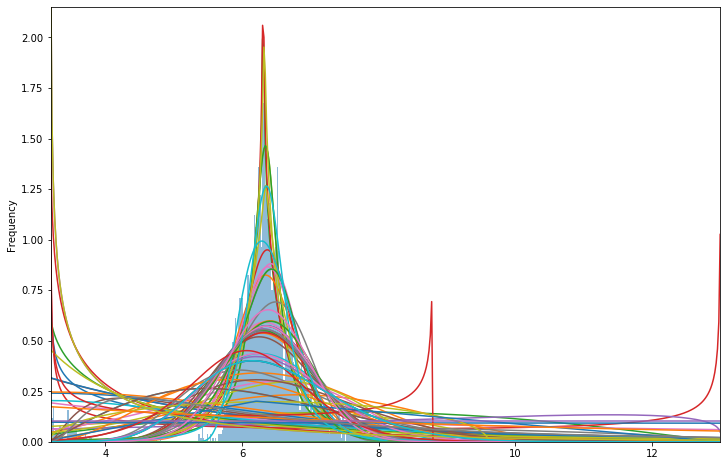

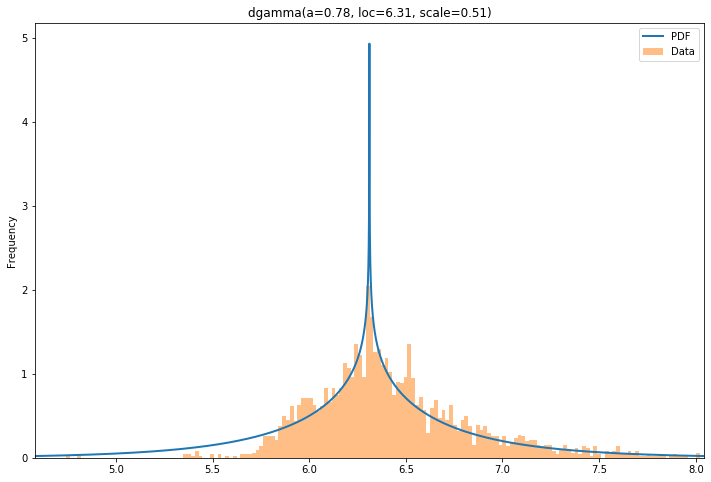

In [10]:
botnet = pd.Series(ctu_botnet_test)
# botnet = pd.Series(kisti_botnet)
plt.figure(figsize=(12,8))
ax = botnet.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(botnet, 500, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
# ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
# ax.set_xlabel(u'Temp (°C)')
# ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
botnet.plot(kind='hist', bins=500, alpha=0.5, label='Data', legend=True, ax=ax, density=True)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(dist_str)

Text(0.5, 1.0, 'genlogistic(c=0.28, loc=7.28, scale=0.57)')

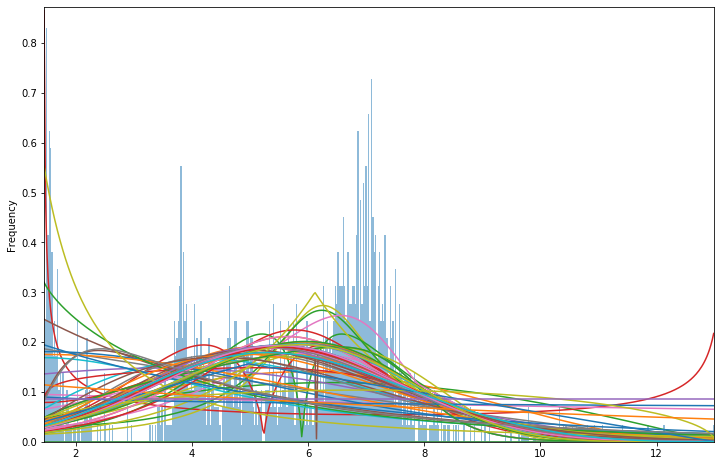

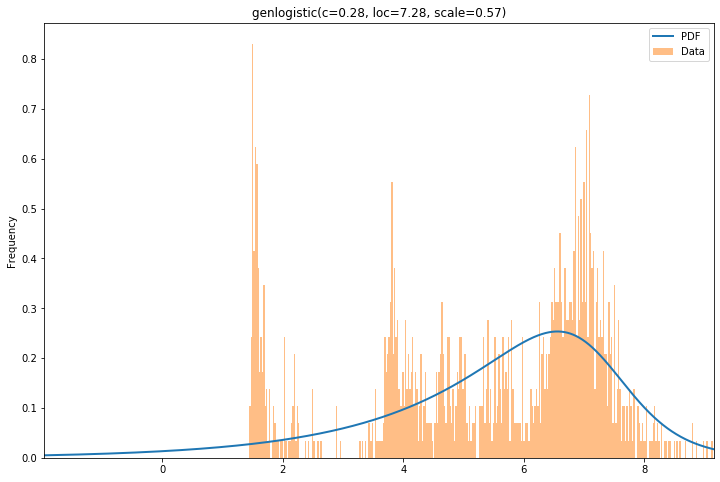

In [16]:
botnet = pd.Series(ctu_botnet)
# botnet = pd.Series(kisti_botnet)
plt.figure(figsize=(12,8))
ax = botnet.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(botnet, 500, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
# ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
# ax.set_xlabel(u'Temp (°C)')
# ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
botnet.plot(kind='hist', bins=500, alpha=0.5, label='Data', legend=True, ax=ax, density=True)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(dist_str)

Text(0.5, 1.0, 'foldcauchy(c=3.63, loc=1.45, scale=0.36)')

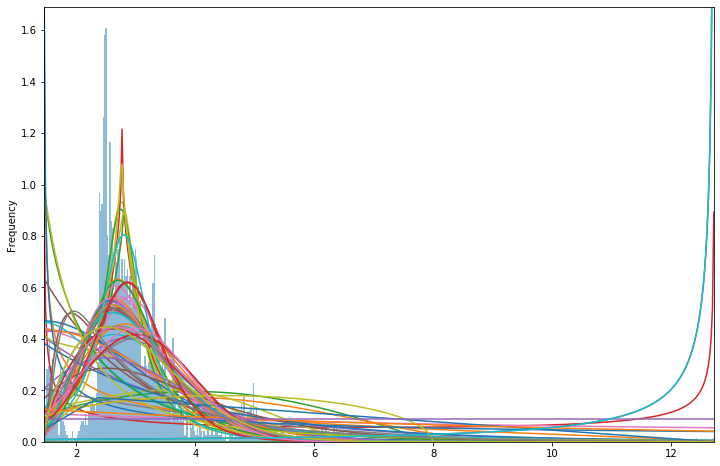

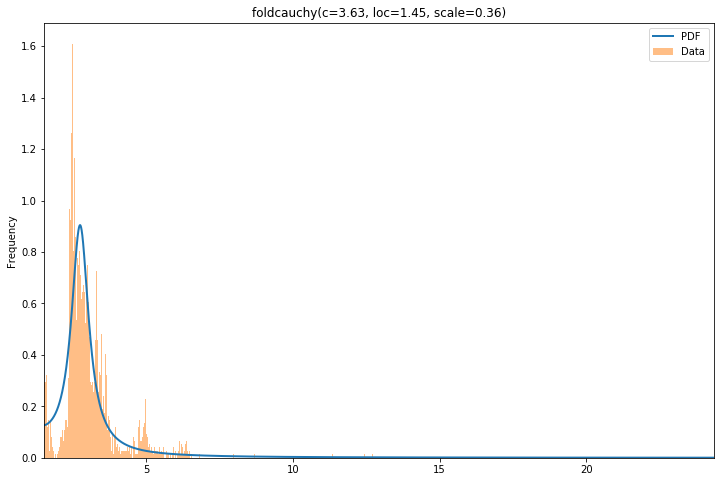

In [12]:
normal = pd.Series(ctu_normal_test)
# knormal = pd.Series(kisti_normal)
plt.figure(figsize=(12,8))
ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(normal, 500, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)


# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
normal.plot(kind='hist', bins=500, alpha=0.5, label='Data', legend=True, ax=ax, density=True)


param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(dist_str)

Text(0.5, 1.0, 'nct(df=0.99, nc=0.73, loc=2.59, scale=0.24)')

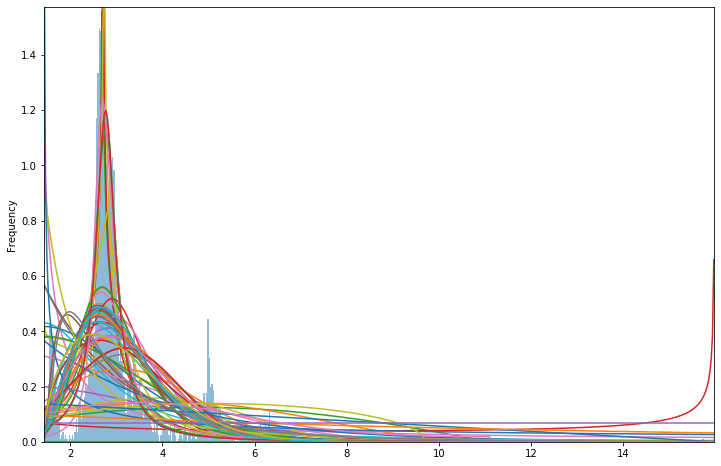

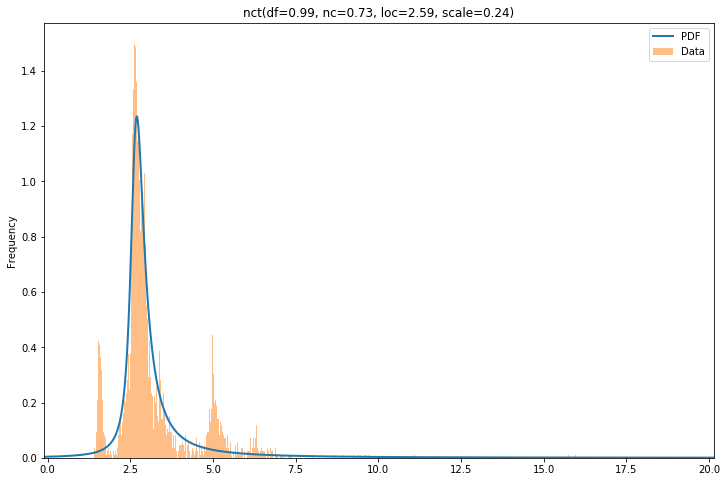

In [16]:
normal = pd.Series(ctu_normal)
# knormal = pd.Series(kisti_normal)
plt.figure(figsize=(12,8))
ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(normal, 500, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)


# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
normal.plot(kind='hist', bins=500, alpha=0.5, label='Data', legend=True, ax=ax, density=True)


param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
ax.set_title(dist_str)

normal mielke
botnet tukeylambda


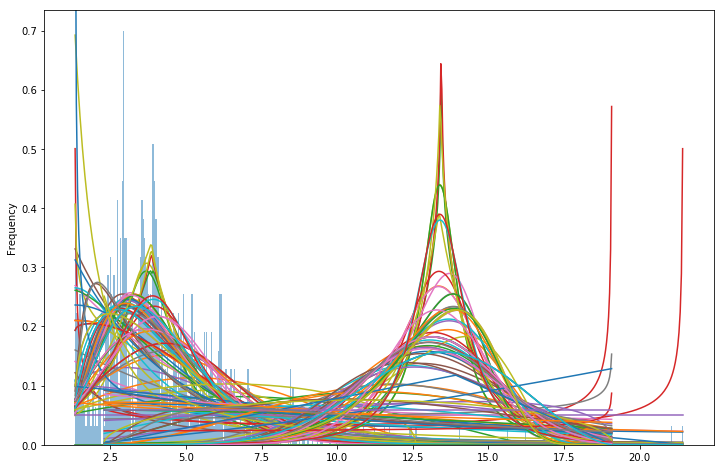

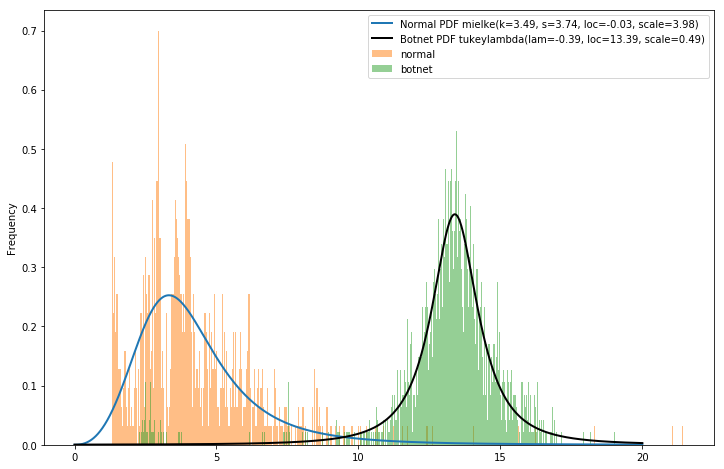

In [18]:
normal_test = pd.Series(ctu_normal_test_60)
botnet_test = pd.Series(ctu_botnet_test_60)
normal = pd.Series(ctu_normal_test_60)
# knormal = pd.Series(kisti_normal)
plt.figure(figsize=(12,8))
ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(normal, 500, ax)
best_dist = getattr(st, best_fit_name)
print("normal", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
normal_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
ax.set_ylim(dataYLim)


# Make PDF with best params 
normal_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display
botnet = pd.Series(ctu_botnet_test_60)

# plt.figure(figsize=(12,8))
# ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
# dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(botnet, 500, ax)
best_dist = getattr(st, best_fit_name)
print("botnet", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
botnet_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
# ax.set_ylim(dataYLim)


# Make PDF with best params 
botnet_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display


plt.figure(figsize=(12,8))
ax = normal_pdf.plot(lw=2, label=f'Normal PDF {normal_dist_str}', legend=True)
ax = botnet_pdf.plot(lw=2, label=f'Botnet PDF {botnet_dist_str}', legend=True)
normal_test.plot(kind='hist', bins=500, alpha=0.5, label='normal', legend=True, ax=ax, density=True)
botnet_test.plot(kind='hist', bins=500, alpha=0.5, label='botnet', legend=True, ax=ax, density=True)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
# ax.set_title(dist_str)
plt.savefig('./300_dnn.png')

normal dgamma
botnet t


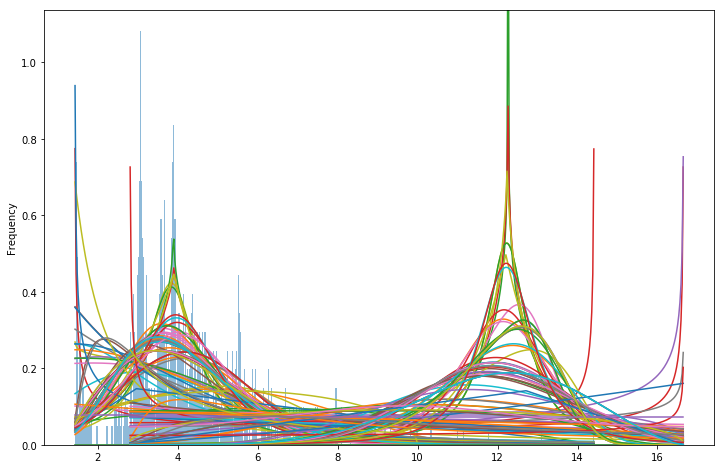

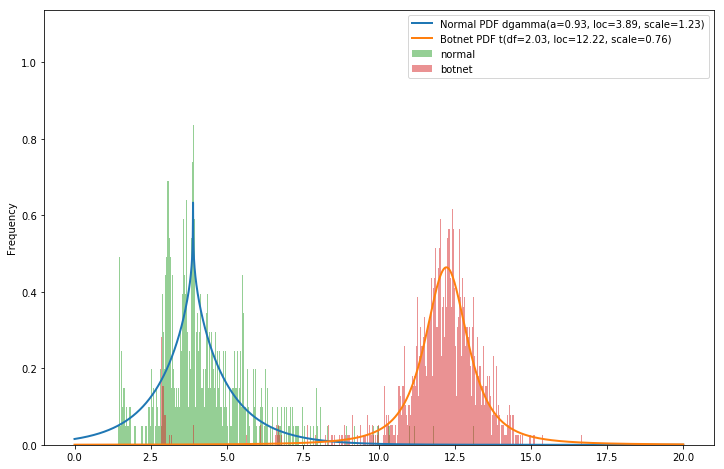

In [23]:
normal_test = pd.Series(ctu_normal_test_60_rnn)
botnet_test = pd.Series(ctu_botnet_test_60_rnn)
normal = pd.Series(ctu_normal_test_60_rnn)
# knormal = pd.Series(kisti_normal)
plt.figure(figsize=(12,8))
ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(normal, 500, ax)
best_dist = getattr(st, best_fit_name)
print("normal", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
normal_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
ax.set_ylim(dataYLim)


# Make PDF with best params 
normal_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display
botnet = pd.Series(ctu_botnet_test_60_rnn)

# plt.figure(figsize=(12,8))
# ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
# dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(botnet, 500, ax)
best_dist = getattr(st, best_fit_name)
print("botnet", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
botnet_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
# ax.set_ylim(dataYLim)


# Make PDF with best params 
botnet_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display


plt.figure(figsize=(12,8))
ax = normal_pdf.plot(lw=2, label=f'Normal PDF {normal_dist_str}', legend=True)
ax = botnet_pdf.plot(lw=2, label=f'Botnet PDF {botnet_dist_str}', legend=True)
normal_test.plot(kind='hist', bins=500, alpha=0.5, label='normal', legend=True, ax=ax, density=True)
botnet_test.plot(kind='hist', bins=500, alpha=0.5, label='botnet', legend=True, ax=ax, density=True)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
# ax.set_title(dist_str)
plt.savefig('./300_rnn2.png')

### 60

normal fatiguelife
botnet mielke


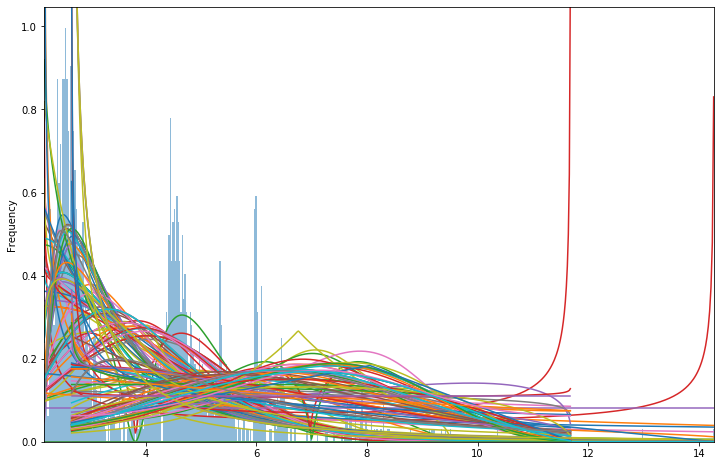

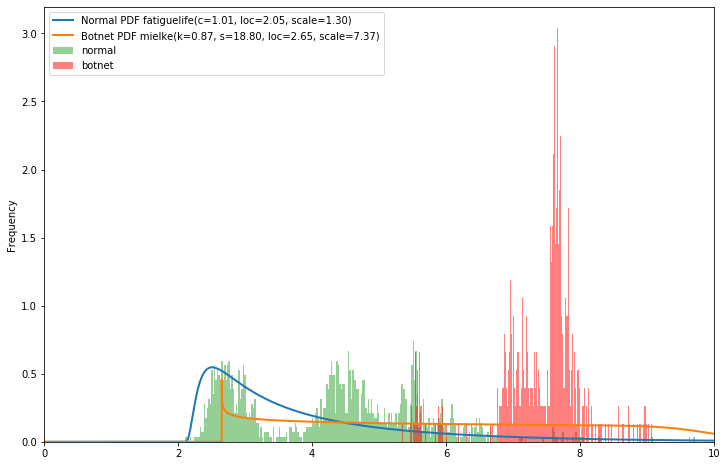

In [411]:
normal_test = pd.Series(ctu_normal_test)
botnet_test = pd.Series(ctu_botnet_test)
normal = pd.Series(ctu_normal)
# knormal = pd.Series(kisti_normal)
plt.figure(figsize=(12,8))
ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(normal, 500, ax)
best_dist = getattr(st, best_fit_name)
print("normal", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
normal_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
ax.set_ylim(dataYLim)


# Make PDF with best params 
normal_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display
botnet = pd.Series(ctu_botnet)

# plt.figure(figsize=(12,8))
# ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
# dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(botnet, 500, ax)
best_dist = getattr(st, best_fit_name)
print("botnet", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
botnet_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
# ax.set_ylim(dataYLim)


# Make PDF with best params 
botnet_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display


plt.figure(figsize=(12,8))
ax = normal_pdf.plot(lw=2, label=f'Normal PDF {normal_dist_str}', legend=True)
ax = botnet_pdf.plot(lw=2, label=f'Botnet PDF {botnet_dist_str}', legend=True)
normal_test.plot(kind='hist', bins=500, alpha=0.5, label='normal', legend=True, ax=ax, density=True)
botnet_test.plot(kind='hist', bins=500, alpha=0.5, label='botnet', legend=True, ax=ax, density=True, color='red')

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
# ax.set_title(dist_str)
plt.savefig('./300_rnn.png')

### 20

normal t
botnet foldcauchy


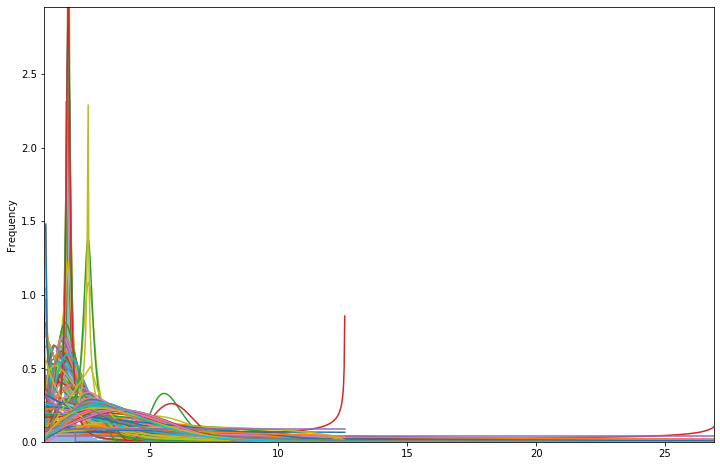

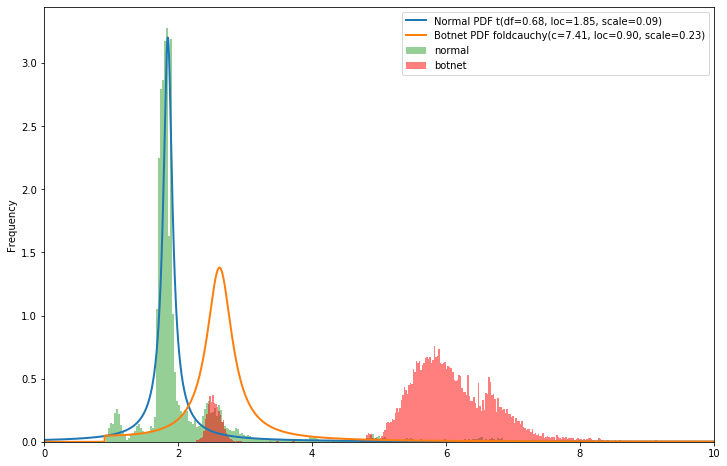

In [416]:
normal_test = pd.Series(ctu_normal_test_20)
botnet_test = pd.Series(ctu_botnet_test_20)
normal = pd.Series(ctu_normal_20)
# knormal = pd.Series(kisti_normal)
plt.figure(figsize=(12,8))
ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(normal, 500, ax)
best_dist = getattr(st, best_fit_name)
print("normal", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
normal_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
ax.set_ylim(dataYLim)


# Make PDF with best params 
normal_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display
botnet = pd.Series(ctu_botnet_20)

# plt.figure(figsize=(12,8))
# ax = normal.plot(kind='hist', bins=500, normed=True, alpha=0.5)
# Save plot limits
# dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(botnet, 500, ax)
best_dist = getattr(st, best_fit_name)
print("botnet", best_fit_name)
param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
botnet_dist_str = '{}({})'.format(best_fit_name, param_str)
# Update plots
# ax.set_ylim(dataYLim)


# Make PDF with best params 
botnet_pdf = make_pdf(best_dist, best_fit_params)
# pdf = make_pdf(st.exponnorm, (1.364376581745733, 14.538969640755951, 0.09862629092510629))
# Display


plt.figure(figsize=(12,8))
ax = normal_pdf.plot(lw=2, label=f'Normal PDF {normal_dist_str}', legend=True)
ax = botnet_pdf.plot(lw=2, label=f'Botnet PDF {botnet_dist_str}', legend=True)
normal_test.plot(kind='hist', bins=500, alpha=0.5, label='normal', legend=True, ax=ax, density=True)
botnet_test.plot(kind='hist', bins=500, alpha=0.5, label='botnet', legend=True, ax=ax, density=True, color='red')

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)
# ax.set_title(dist_str)
plt.savefig('./5_rnn.png')

In [317]:
param = st.exponnorm.fit(normal)

In [319]:
param

(0.09998458635715245, 15.76768261587436, 0.1300836972183443)

In [460]:
param = st.fatiguelife.fit(kisti_normal)

In [461]:
param

(1.055197221191638, 4.150537457613445, 0.9674377813315782)

In [462]:
st.fatiguelife.pdf(8, loc=param[-2], scale=param[-1], *param[:-2])

0.045022791114953

In [323]:
abparam = st.dweibull.fit(KISTI_botnet)

In [324]:
abparam

(2.024966030037642, 15.888654191388824, 0.11049295602313511)

In [329]:
st.dweibull.pdf(15.95, loc=abparam[-2], scale=abparam[-1], *abparam[:-2])

3.7000292156123025

In [331]:
import numpy as np
import csv
import pandas as pd
import scipy.stats as st
import math
import sys
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

def fit_to_all_distributions(data):
#     dist_names = ['fatiguelife', 'invgauss', 'johnsonsu', 'johnsonsb', 'lognorm', 'exponnorm',\
#                   'norminvgauss', 'powerlognorm', 'exponweib','genextreme', 'pareto', 'norm','gennorm']
    dist_names= ['norm']
    params = {}
    for dist_name in dist_names:
        try:
            dist = getattr(st, dist_name)
            param = dist.fit(data)

            params[dist_name] = param
        except Exception:
            print("Error occurred in fitting")
            params[dist_name] = "Error"

    return params 


def get_best_distribution_using_chisquared_test(data, params):

    histo, bin_edges = np.histogram(data, bins='auto', density=True)
    number_of_bins = len(bin_edges) - 1
    observed_values = histo

    dist_names = ['fatiguelife', 'invgauss', 'johnsonsu', 'johnsonsb', 'lognorm', 'exponnorm',\
                  'norminvgauss', 'powerlognorm', 'exponweib','genextreme', 'pareto', 'norm','gennorm']
    
    dist_names= ['norm']
    dist_results = []

    for dist_name in dist_names:

        param = params[dist_name]
        if (param != "Error"):
            # Applying the SSE test
            arg = param[:-2]
            loc = param[-2]
            scale = param[-1]
            cdf = getattr(st, dist_name).cdf(bin_edges, loc=loc, scale=scale, *arg)
            expected_values = len(data)/number_of_bins * np.diff(cdf)
            c , p = st.chisquare(observed_values, expected_values, ddof=len(param))
            dist_results.append([dist_name, c, p])


    # select the best fitted distribution
    best_dist, best_c, best_p = None, sys.maxsize, 0

    for item in dist_results:
        name = item[0]
        c = item[1]
        p = item[2]
        if (not math.isnan(c)):
            if (c < best_c):
                best_c = c
                best_dist = name
                best_p = p

    # print the name of the best fit and its p value

    print("Best fitting distribution: " + str(best_dist))
    print("Best c value: " + str(best_c))
    print("Best p value: " + str(best_p))
    print("Parameters for the best fit: " + str(params[best_dist]))

    return best_dist, best_c, params[best_dist], dist_results

In [336]:
values = pd.Series(KISTI_botnet)
values2 = pd.Series(normal)

In [337]:
# a, m = 3., 2.
# values = (np.random.pareto(a, 1000) + 1) * m

params = fit_to_all_distributions(values2)
best_dist_chi, best_chi, params_chi, dist_results_chi \
                = get_best_distribution_using_chisquared_test(values2, params)

Best fitting distribution: norm
Best c value: 66.50775224712903
Best p value: 0.49400056021504074
Parameters for the best fit: (15.780767, 0.13065766)


In [335]:
# a, m = 3., 2.
# values = (np.random.pareto(a, 1000) + 1) * m

params = fit_to_all_distributions(values)
best_dist_chi, best_chi, params_chi, dist_results_chi \
                = get_best_distribution_using_chisquared_test(values, params)

Best fitting distribution: norm
Best c value: 14.923266425778683
Best p value: 0.45695850485548606
Parameters for the best fit: (15.885526, 0.110142715)


In [244]:
a = np.array([1,2,3])

In [248]:
ix = [1,2]
ix = np.asarray(ix)

In [260]:
ix

array([1, 2])

In [254]:
mask = np.ones(len(a), dtype=bool)


In [255]:
mask

array([ True,  True,  True])

In [261]:
mask[ix] = False
result = a[mask]

In [262]:
result

array([1])

In [363]:
entire = pd.read_csv("pre_vae_small_False_5_False_True.csv", index_col=[0])
share = pd.read_csv("pre_vae_small_False_5_False_True_shared.csv",index_col=[0])

In [364]:
entire.head()

,arp,class,dhcp,dns,duration mean,duration std,http,icmp,id.orig_h,id.orig_p,...,orig_pkts mean,orig_pkts std,rtp,smtp,sripcnt,ssh,ssl,tcp,time_chunk,udp
0,0.0,norm,0.0,0.0,0.130425,0.0,0.0,0.0,114.71.101.155,0.0,...,0.000085,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
1,0.0,norm,0.0,0.0,0.085114,0.0,0.0,0.0,155.230.178.52,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,128,0.0
2,0.0,norm,0.0,0.0,0.043467,0.0,0.0,0.0,210.112.114.199,0.0,...,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,1.0,152,0.0
3,0.0,norm,0.0,0.0,0.008695,0.0,0.0,0.0,155.230.31.75,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,167,0.0
4,0.0,norm,0.0,0.0,0.010580,0.0,0.0,0.0,223.28.138.179,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,171,0.0


In [371]:
share.columns

Index(['arp', 'class', 'dns', 'duration mean', 'duration std', 'http', 'icmp',
       'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'igmp', 'ntp',
       'orig_ip_bytes mean', 'orig_ip_bytes std', 'orig_pkts mean',
       'orig_pkts std', 'rtp', 'smb', 'smtp', 'sripcnt', 'ssh', 'ssl', 'tcp',
       'time_chunk', 'udp'],
      dtype='object')

In [365]:
entire.columns

Index(['arp', 'class', 'dhcp', 'dns', 'duration mean', 'duration std', 'http',
       'icmp', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'igmp',
       'ntp', 'orig_ip_bytes mean', 'orig_ip_bytes std', 'orig_pkts mean',
       'orig_pkts std', 'rtp', 'smtp', 'sripcnt', 'ssh', 'ssl', 'tcp',
       'time_chunk', 'udp'],
      dtype='object')

In [357]:
a = ['arp',  'dhcp', 'dns', 'duration mean',
       'duration std', 'http', 'icmp', 'id.orig_p', 'id.resp_h',
       'id.resp_p', 'igmp', 'ntp', 'orig_ip_bytes mean', 'orig_ip_bytes std',
       'orig_pkts mean', 'orig_pkts std', 'rtp', 'smtp', 'sripcnt', 'ssh',
       'ssl', 'tcp', 'udp']

In [358]:
len(a)

23

In [372]:
b= ['arp', 'dns', 'duration mean', 'duration std', 'http', 'icmp',
        'id.orig_p', 'id.resp_h', 'id.resp_p', 'igmp', 'ntp',
       'orig_ip_bytes mean', 'orig_ip_bytes std', 'orig_pkts mean',
       'orig_pkts std', 'rtp', 'smb', 'smtp', 'sripcnt', 'ssh', 'ssl', 'tcp',
        'udp']

In [373]:
len(b)

23

In [366]:
a[3]

'duration mean'

In [367]:
a[12]

'orig_ip_bytes mean'

In [368]:
a[15]

'orig_pkts std'

In [374]:
b[11]

'orig_ip_bytes mean'

In [375]:
b[14]

'orig_pkts std'

In [445]:
ctu = pd.read_csv('pre_vae_345710111213_small_False_60_False.csv',index_col=[0])

In [447]:
len(ctu.columns)

26

In [448]:
c = ['arp',  'dhcp', 'dns', 'duration mean', 'duration std', 'http',
       'icmp',  'id.orig_p', 'id.resp_h', 'id.resp_p', 'igmp',
       'ntp', 'orig_ip_bytes mean', 'orig_ip_bytes std', 'orig_pkts mean',
       'orig_pkts std', 'rtp', 'smtp', 'sripcnt', 'ssh', 'ssl', 'tcp',
        'udp']

In [449]:
c[8]

'id.resp_h'

In [450]:
c[9]

'id.resp_p'

In [452]:
c[22]

'udp'

In [453]:
ctu.head()

,arp,class,dhcp,dns,duration mean,duration std,http,icmp,id.orig_h,id.orig_p,...,orig_pkts mean,orig_pkts std,rtp,smtp,sripcnt,ssh,ssl,tcp,time_chunk,udp
0,0.000000,botnet,0.0,0.333333,0.001675,0.002352,0.666667,0.0,147.32.84.165,0.009807,...,0.000018,0.000022,0.0,0.0,0.009634,0.0,0.0,0.982143,0,0.017857
1,0.000000,normal,0.0,0.000000,0.005039,0.028188,0.000000,0.0,147.32.84.170,0.018739,...,0.000024,0.000112,0.0,0.0,0.018567,0.0,0.0,0.364486,0,0.635514
2,0.055556,normal,0.0,0.000000,0.083322,0.364280,0.000000,0.0,147.32.87.36,0.002277,...,0.000009,0.000036,0.0,0.0,0.002978,0.0,0.0,0.000000,0,0.944444
3,0.000000,botnet,0.0,0.454545,0.001760,0.003856,0.545455,0.0,147.32.84.165,0.015236,...,0.000049,0.000337,0.0,0.0,0.018217,0.0,0.0,0.809524,1,0.190476
4,0.000000,normal,0.0,0.000000,0.000682,0.009512,0.000000,0.0,147.32.84.170,0.017338,...,0.000017,0.000096,0.0,0.0,0.017166,0.0,0.0,0.333333,1,0.666667


In [61]:
df = pd.read_csv('pre_vae_12689_small_False_60_False.csv', index_col=[0])

In [62]:
df.head()

,arp,class,dhcp,dns,duration mean,duration std,http,icmp,id.orig_h,id.orig_p,...,orig_pkts mean,orig_pkts std,rtp,smtp,sripcnt,ssh,ssl,tcp,time_chunk,udp
0,0.0,normal,0.0,0.0,6.005131e-05,0.000000e+00,0.0,0.0,147.32.84.164,0.000580,...,0.000104,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0,0.000000
1,0.0,botnet,0.0,0.0,1.617557e-03,7.587212e-03,1.0,0.0,147.32.84.165,0.006384,...,0.000019,0.000124,0.0,0.0,0.003614,0.0,0.0,1.000000,0,0.000000
2,0.0,normal,0.0,0.0,2.498211e-03,1.831519e-02,0.0,0.0,147.32.84.170,0.015670,...,0.000077,0.000241,0.0,0.0,0.009396,0.0,0.0,0.333333,0,0.666667
3,0.0,normal,0.0,0.0,7.925952e-08,2.327662e-08,0.0,0.0,147.32.87.36,0.002902,...,0.000021,0.000000,0.0,0.0,0.001807,0.0,0.0,0.000000,0,1.000000
4,0.0,botnet,0.0,0.0,4.695379e-04,4.093442e-03,1.0,0.0,147.32.84.165,0.022055,...,0.000005,0.000067,0.0,0.0,0.013372,0.0,0.0,1.000000,1,0.000000


In [51]:
df.columns

Index(['arp', 'class', 'dhcp', 'dns', 'duration mean', 'duration std', 'http',
       'icmp', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'igmp',
       'ntp', 'orig_ip_bytes mean', 'orig_ip_bytes std', 'orig_pkts mean',
       'orig_pkts std', 'rtp', 'smtp', 'sripcnt', 'ssh', 'ssl', 'tcp',
       'time_chunk', 'udp'],
      dtype='object')

In [380]:
test_df = pd.read_csv('test.csv', index_col=[0])

In [381]:
len(df)

5887

In [299]:
# test_df = pd.read_csv('pre_vae_12689_small_False_60_False.csv', index_col=[0])

In [179]:
from collections import Counter

In [357]:
with open('./60_CTU_test_recon_lst.pkl', 'rb') as f:
    recon_test = pickle.load(f)
# with open('./120_CTU_test_recon_lst.pkl', 'rb') as f:
#     recon_test = pickle.load(f)

In [358]:
recon_test

{'recon_lst': array([5.0831513, 2.921124 , 6.4747076, ..., 2.59449  , 2.364713 ,
        2.6870298], dtype=float32),
 'botnet_index': array([   2,    6,    8, ..., 5867, 5869, 5872]),
 'order': [array([ 90,  44,  31,  16,  78,  76, 110,  68,  26,  20, 105,  14,  53,
          40,  91, 116,  55,   6,  45, 115,  70,  60,  30,  86,  85,  58,
          33,  82,  80,  34,  35,  46, 126,  36,  65,  66,  73,   0,  52,
          10, 113, 118, 120,  13, 123,  15, 106, 104, 100,  96, 125,  94,
          93, 114,  49,   1,  50,  51,  48,   3,   5,  27,  43,  11,  28,
          12,  38,  37,  17,  18,  21,  23,  25,  41,  63,  71,  95, 111,
         112,  83,  81,  89, 101,  75,  74,  56,  88, 108, 119, 121,  67,
          97, 103,  61,  59,  98, 107,  54,   9, 109, 117,   8,   7,   4,
         122,   2, 124, 102,  92,  19,  39,  57,  47,  62,  64,  69,  42,
          72,  77,  79,  32,  84,  24,  22, 127,  99,  87,  29]),
  array([113, 119, 112, 123, 122,  90,  72, 108, 124,  93, 120,  96,  95,
 

In [360]:
len(recon_test["recon_lst"])

5887

In [382]:
test_df["t_t_c"] = test_df.apply(lambda x:x["time_chunk"]//3, axis=1)

In [383]:
test_len = test_df["t_t_c"].max()

In [384]:
test_df["t_t_c_2"] = test_df.apply(lambda x:x["t_t_c"] - 128*(x["t_t_c"]//128), axis=1)

In [385]:
batch_size = 128
df_dict = {}
for k in range(int(test_len/128)+1):
    df_dict[k] = test_df[(test_df["t_t_c"]<(k+1)*batch_size) & (test_df["t_t_c"]>=(k)*batch_size)]

In [386]:
df_dict.keys()

dict_keys([0, 1, 2, 3])

In [387]:
dfs = []
for k in df_dict.keys():
    reordered = []
#     sort_key = df_dict[k].groupby('t_t_c_2').size().reset_index(name='size').sort_values(['size'], ascending=False)["t_t_c_2"].values
    sort_key = recon_test['order'][k]
    for s in sort_key:
        f = df_dict[k][df_dict[k]["t_t_c_2"]==s]
        reordered.append(f)
    df = pd.concat(reordered)
    dfs.append(df)
total_df = pd.concat(dfs)

In [388]:
len(total_df)

5887

In [389]:
recon_test['botnet_index'][:10]

array([ 2,  6,  8, 12, 16, 20, 22, 26, 30, 32])

In [390]:
reordered_df = total_df.reset_index()

In [391]:
reordered_df[:20]

,index,arp,class,dhcp,dns,duration mean,duration std,http,icmp,id.orig_h,...,scenario,smtp,sripcnt,ssh,ssl,tcp,time_chunk,udp,t_t_c,t_t_c_2
0,660,0.000000,normal,0.0,0.0,0.997301,0.000000,0.0,0.0,147.32.84.13,...,8,0.0,0.000000,0.0,0.0,0.000000,270,1.000000,90,90
1,661,0.000000,normal,0.0,0.0,0.000025,0.000000,0.0,0.0,147.32.84.164,...,8,0.0,0.000000,0.0,0.0,1.000000,270,0.000000,90,90
2,662,0.000000,botnet,0.0,0.0,0.017104,0.000000,1.0,0.0,147.32.84.165,...,8,0.0,0.000000,0.0,0.0,1.000000,270,0.000000,90,90
3,663,0.000000,normal,0.0,0.0,0.039582,0.279853,0.0,0.0,147.32.84.170,...,8,0.0,0.008674,0.0,0.0,0.360000,270,0.640000,90,90
4,664,0.000000,normal,0.0,0.0,0.994836,0.000000,0.0,0.0,147.32.86.96,...,8,0.0,0.000000,0.0,0.0,0.000000,270,1.000000,90,90
5,665,0.142857,normal,0.0,0.0,0.071433,0.267285,0.0,0.0,147.32.87.36,...,8,0.0,0.002168,0.0,0.0,0.000000,270,0.857143,90,90
6,666,0.000000,botnet,0.0,0.0,0.017102,0.000000,1.0,0.0,147.32.84.165,...,8,0.0,0.000000,0.0,0.0,1.000000,271,0.000000,90,90
7,667,0.000000,normal,0.0,0.0,0.000006,0.000024,0.0,0.0,147.32.84.170,...,8,0.0,0.008312,0.0,0.0,0.333333,271,0.666667,90,90
8,668,0.000000,botnet,0.0,0.0,0.019612,0.000000,1.0,0.0,147.32.84.165,...,8,0.0,0.000000,0.0,0.0,1.000000,272,0.000000,90,90
9,669,0.000000,normal,0.0,0.0,0.000006,0.000023,0.0,0.0,147.32.84.170,...,8,0.0,0.008312,0.0,0.0,0.333333,272,0.666667,90,90


In [213]:
Counter(df["scenario"])

Counter({8: 2947, 1: 1285, 2: 83, 6: 87, 9: 1485})

In [363]:
botnet_idx = reordered_df[reordered_df["class"]=="botnet"].index.values

In [364]:
botnet_idx

array([   2,    6,    8, ..., 5867, 5869, 5872])

In [365]:
recon_test['recon_lst']

array([5.0831513, 2.921124 , 6.4747076, ..., 2.59449  , 2.364713 ,
       2.6870298], dtype=float32)

In [366]:
botnet_recon = recon_test['recon_lst'][botnet_idx]

In [367]:
len(botnet_recon)

2585

In [221]:
ctu_botnet_test 

array([6.4127617, 6.7481923, 6.524507 , ..., 6.1400604, 6.4406962,
       5.529171 ], dtype=float32)

In [368]:
idx = np.where(botnet_recon < 4)

In [369]:
len(idx[0])

74

In [370]:
len(botnet_recon[idx[0]])

74

In [371]:
botnet_recon[idx[0]]

array([3.4858153, 3.2663074, 3.087784 , 3.199832 , 3.2804565, 3.309299 ,
       3.258989 , 3.2575555, 3.3143137, 3.4945273, 3.2976296, 3.4371836,
       3.2502263, 3.2443779, 3.3661132, 3.4942834, 3.5770168, 3.1027632,
       3.2070189, 3.3514037, 3.3334143, 3.1980631, 3.3288434, 3.302652 ,
       3.2174892, 3.3566341, 3.2540112, 3.237392 , 2.967009 , 2.9379597,
       2.9407816, 2.9928937, 3.1555998, 2.9554005, 2.9260573, 2.9094167,
       2.9048991, 2.919016 , 2.9688873, 3.095466 , 3.0915532, 2.9975522,
       2.9498956, 2.9256802, 2.9164405, 2.9217732, 2.9493253, 3.019674 ,
       3.18141  , 3.0543218, 2.9776816, 2.937948 , 2.9168468, 2.9071321,
       2.907895 , 2.9235508, 2.9673681, 3.0689614, 3.2507584, 3.3683457,
       3.0621955, 3.1553597, 3.1370757, 3.348051 , 3.104418 , 3.1823907,
       3.2666478, 3.2283025, 3.2136497, 3.199129 , 3.1433337, 3.1079886,
       3.239541 , 3.0919976], dtype=float32)

In [372]:
idx[0]

array([  34,   41,   83,  106,  112,  124,  267,  321,  419,  430,  431,
        432,  433,  451,  453,  461,  462,  480,  501,  502,  503,  520,
        521,  558,  559,  653,  680, 2036, 2051, 2052, 2053, 2054, 2055,
       2065, 2066, 2067, 2068, 2069, 2070, 2071, 2074, 2075, 2076, 2077,
       2078, 2079, 2080, 2081, 2082, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2104, 2145, 2226, 2231, 2235, 2263, 2300, 2301,
       2302, 2311, 2312, 2400, 2435, 2444, 2508, 2564])

In [374]:
under4_dict = {}
for i in idx[0]:
    under4_dict[i] = botnet_idx[i]

In [376]:
recon_under4 = list()
for i in idx[0]:
    recon_under4.append(under4_dict[i])

In [392]:
Counter(reordered_df.iloc[recon_under4].scenario)

Counter({8: 24, 6: 16, 2: 1, 9: 33})

In [393]:
Counter(test_df[test_df["class"]=="botnet"]["scenario"])

Counter({8: 1007, 6: 24, 2: 33, 1: 284, 9: 1237})

In [394]:
Counter(test_df[test_df["class"]=="normal"]["scenario"])

Counter({8: 1940, 1: 1001, 2: 50, 6: 63, 9: 248})

In [395]:
Counter(test_df["scenario"])

Counter({8: 2947, 1: 1285, 2: 83, 6: 87, 9: 1485})

In [405]:
24/gh87

0.27586206896551724

In [396]:
#8
24/1007

0.023833167825223437

In [397]:
#6
16/24

0.6666666666666666

In [398]:
#2
1/33

0.030303030303030304

In [399]:
#1
0/284

0.0

In [400]:
#9
33/1237

0.02667744543249798

In [401]:
botnet_under4_df = reordered_df.iloc[recon_under4]

In [402]:
botnet_under4_df.mean()

index                 2653.594595
arp                      0.000000
dhcp                     0.000000
dns                      0.000000
duration mean            0.001404
duration std             0.000581
http                     0.000000
icmp                     0.000000
id.orig_p                0.010416
id.resp_h                0.007765
id.resp_p                0.004200
igmp                     0.000000
ntp                      0.000000
orig_ip_bytes mean       0.000008
orig_ip_bytes std        0.000041
orig_pkts mean           0.000033
orig_pkts std            0.000061
rtp                      0.000000
scenario                 7.932432
smtp                     0.000000
sripcnt                  0.006124
ssh                      0.000000
ssl                      0.000000
tcp                      1.000000
time_chunk             769.905405
udp                      0.000000
t_t_c                  256.229730
t_t_c_2                 52.121622
dtype: float64

In [ ]:
# dns, http, id.resp_h, id.resp_p, smtp, sripcnt, ssl, 

In [403]:
reordered_df[reordered_df["class"]=="botnet"].mean()

index                 3165.801161
arp                      0.000000
dhcp                     0.000000
dns                      0.488640
duration mean            0.009918
duration std             0.035643
http                     0.444290
icmp                     0.000809
id.orig_p                0.032474
id.resp_h                0.017173
id.resp_p                0.014351
igmp                     0.000000
ntp                      0.000000
orig_ip_bytes mean       0.000065
orig_ip_bytes std        0.000800
orig_pkts mean           0.000159
orig_pkts std            0.001029
rtp                      0.000000
scenario                 7.614313
smtp                     0.023113
sripcnt                  0.035659
ssh                      0.000000
ssl                      0.014170
tcp                      0.678765
time_chunk             826.482398
udp                      0.320426
t_t_c                  275.160542
t_t_c_2                 61.249516
dtype: float64

In [404]:
reordered_df[reordered_df["class"]=="normal"].mean()

index                 2768.578134
arp                      0.014103
dhcp                     0.000000
dns                      0.027559
duration mean            0.112260
duration std             0.037842
http                     0.005148
icmp                     0.010882
id.orig_p                0.025307
id.resp_h                0.003215
id.resp_p                0.007833
igmp                     0.000000
ntp                      0.125379
orig_ip_bytes mean       0.001444
orig_ip_bytes std        0.004052
orig_pkts mean           0.001700
orig_pkts std            0.004279
rtp                      0.000000
scenario                 5.824046
smtp                     0.000000
sripcnt                  0.016033
ssh                      0.000000
ssl                      0.000000
tcp                      0.315327
time_chunk             762.617202
udp                      0.659688
t_t_c                  253.878558
t_t_c_2                 62.421260
dtype: float64